# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# ME: Create short list for testing
# testcities = ['ushuaia', 'provideniya', 'albany']
# ME: Create results to hold all of the retrieved json data for testing purps
results = []

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}appid={weather_api_key}&q={city}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1 

    # Run an API request for each of the cities
    response = requests.get(city_url)
    response_json = response.json()
    results.append(response_json) 
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()
#         city_weather = results['weather'][['main', 'description', 'icon']# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=severo-kurilsk
Processing Record 2 of Set 1 | narsaq
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=narsaq
Processing Record 3 of Set 1 | kavieng
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=kavieng
Processing Record 4 of Set 1 | kruisfontein
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=kruisfontein
Processing Record 5 of Set 1 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=mataura
Processing Record 6 of Set 1 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=cabo san lucas
Processing Record 7 of Set 1 | wulanhaote
https://api.openweathermap.org/data/2.5/weathe

Processing Record 8 of Set 2 | rikitea
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=rikitea
Processing Record 9 of Set 2 | asfi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=asfi
Processing Record 10 of Set 2 | pangai
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=pangai
Processing Record 11 of Set 2 | albany
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=albany
Processing Record 12 of Set 2 | barentsburg
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=barentsburg
City not found. Skipping...
Processing Record 13 of Set 2 | kemi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=kemi
Processing Record 14 of Set 2 | georgetown
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=georgetown
Processing Record

Processing Record 16 of Set 3 | atuona
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=atuona
Processing Record 17 of Set 3 | ahipara
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=ahipara
Processing Record 18 of Set 3 | ingham
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=ingham
Processing Record 19 of Set 3 | san cristobal
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=san cristobal
Processing Record 20 of Set 3 | tsihombe
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=tsihombe
City not found. Skipping...
Processing Record 21 of Set 3 | guelengdeng
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=guelengdeng
City not found. Skipping...
Processing Record 22 of Set 3 | shimoda
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524a

Processing Record 24 of Set 4 | bambous virieux
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=bambous virieux
Processing Record 25 of Set 4 | bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=bengkulu
Processing Record 26 of Set 4 | lavrentiya
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=lavrentiya
Processing Record 27 of Set 4 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=arraial do cabo
Processing Record 28 of Set 4 | port alfred
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=port alfred
Processing Record 29 of Set 4 | gandhidham
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=gandhidham
Processing Record 30 of Set 4 | klaksvik
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a

Processing Record 32 of Set 5 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=illoqqortoormiut
City not found. Skipping...
Processing Record 33 of Set 5 | homer
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=homer
Processing Record 34 of Set 5 | diffa
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=diffa
Processing Record 35 of Set 5 | ayan
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=ayan
Processing Record 36 of Set 5 | east london
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=east london
Processing Record 37 of Set 5 | hamilton
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=hamilton
Processing Record 38 of Set 5 | aviles
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=aviles
P

Processing Record 41 of Set 6 | olafsvik
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=olafsvik
Processing Record 42 of Set 6 | ust-kulom
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=ust-kulom
Processing Record 43 of Set 6 | keffi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=keffi
Processing Record 44 of Set 6 | cooma
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=cooma
Processing Record 45 of Set 6 | sangar
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=sangar
Processing Record 46 of Set 6 | fairbanks
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=fairbanks
Processing Record 47 of Set 6 | port augusta
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=port augusta
Processing Record 48 of Set 6 |

City not found. Skipping...
Processing Record 0 of Set 8 | yabrud
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=yabrud
Processing Record 1 of Set 8 | qinhuangdao
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=qinhuangdao
Processing Record 2 of Set 8 | saint george
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=saint george
Processing Record 3 of Set 8 | mubi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=mubi
Processing Record 4 of Set 8 | abu dhabi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=abu dhabi
Processing Record 5 of Set 8 | grand-santi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=grand-santi
Processing Record 6 of Set 8 | trincomalee
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=tr

Processing Record 8 of Set 9 | sept-iles
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=sept-iles
Processing Record 9 of Set 9 | tuatapere
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=tuatapere
Processing Record 10 of Set 9 | kerugoya
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=kerugoya
Processing Record 11 of Set 9 | thano bula khan
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=thano bula khan
City not found. Skipping...
Processing Record 12 of Set 9 | kumo
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=kumo
Processing Record 13 of Set 9 | cherskiy
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=cherskiy
Processing Record 14 of Set 9 | marzuq
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=ma

Processing Record 17 of Set 10 | flinders
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=flinders
Processing Record 18 of Set 10 | gambela
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=gambela
Processing Record 19 of Set 10 | sungairaya
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=sungairaya
Processing Record 20 of Set 10 | dubbo
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=dubbo
Processing Record 21 of Set 10 | lethem
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=lethem
Processing Record 22 of Set 10 | mandalgovi
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=mandalgovi
Processing Record 23 of Set 10 | gizo
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=gizo
Processing Record 24 of Set 10 |

Processing Record 26 of Set 11 | maneadero
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=maneadero
Processing Record 27 of Set 11 | buala
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=buala
Processing Record 28 of Set 11 | talaya
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=talaya
Processing Record 29 of Set 11 | sorong
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=sorong
Processing Record 30 of Set 11 | phan rang
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=phan rang
City not found. Skipping...
Processing Record 31 of Set 11 | rosa zarate
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=rosa zarate
Processing Record 32 of Set 11 | port macquarie
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q

Processing Record 34 of Set 12 | daru
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=daru
Processing Record 35 of Set 12 | rust
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=rust
Processing Record 36 of Set 12 | owando
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=owando
Processing Record 37 of Set 12 | sandila
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=sandila
Processing Record 38 of Set 12 | neiba
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=neiba
Processing Record 39 of Set 12 | aksu
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=aksu
Processing Record 40 of Set 12 | den helder
https://api.openweathermap.org/data/2.5/weather?appid=b69c8f524add5c0bdc258c74bd65a4cf&q=den helder
Processing Record 41 of Set 12 | mosquera
https://ap

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,0.17,63,99,9.43,RU,2022-11-29
1,narsaq,60.9167,-46.0500,2.12,99,100,1.22,GL,2022-11-29
2,kavieng,-2.5744,150.7967,29.66,58,14,3.03,PG,2022-11-29
3,kruisfontein,-34.0033,24.7314,14.94,84,43,2.37,ZA,2022-11-29
4,mataura,-46.1927,168.8643,15.27,72,100,2.19,NZ,2022-11-29


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,0.17,63,99,9.43,RU,2022-11-29 03:29:34
1,narsaq,60.9167,-46.0500,2.12,99,100,1.22,GL,2022-11-29 03:32:43
2,kavieng,-2.5744,150.7967,29.66,58,14,3.03,PG,2022-11-29 03:32:03
3,kruisfontein,-34.0033,24.7314,14.94,84,43,2.37,ZA,2022-11-29 03:32:43
4,mataura,-46.1927,168.8643,15.27,72,100,2.19,NZ,2022-11-29 03:30:07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

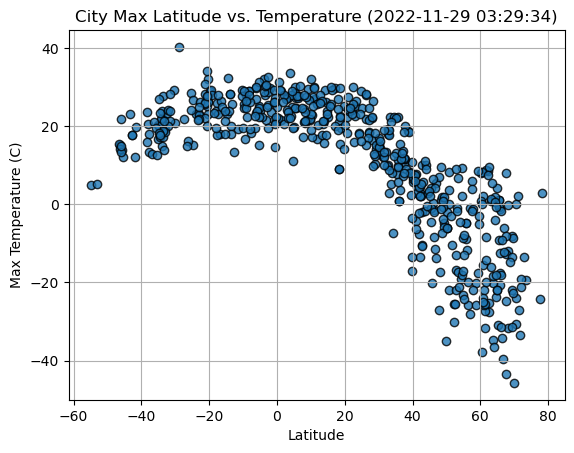

In [21]:
# Build scatter plot for latitude vs. temperature
date = city_data_df['Date'][0]
# pd.to_datetime(city_data_df['Date'][0], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

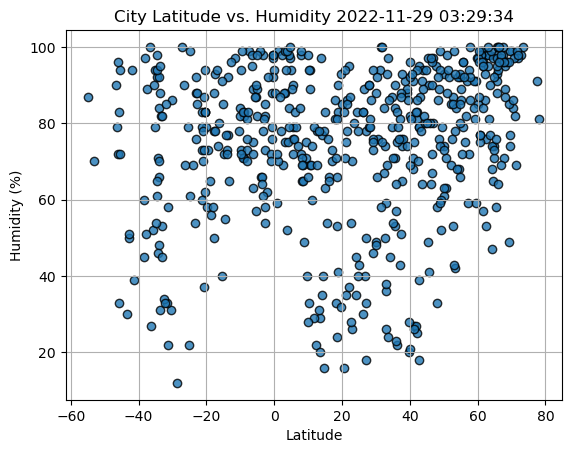

In [25]:
# Build scatter plot for latitude vs. humidity
date = city_data_df['Date'][0]
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

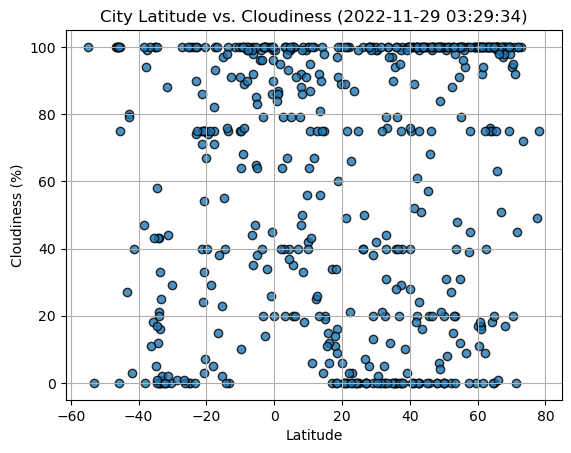

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# date = city_data_df['Date'][0]
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

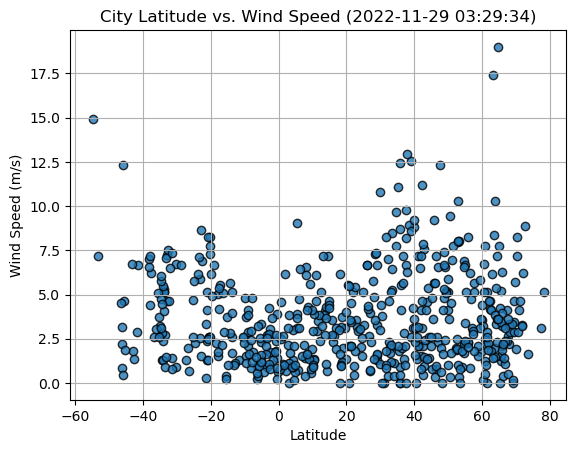

In [29]:
# Build the scatter plots for latitude vs. wind speed
# date = city_data_df['Date'][0]
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
def linreg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x['Lat'],y)
    regress_values = x['Lat'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(0.15,0.15),xycoords='figure fraction',fontsize=15,color="red",annotation_clip=False)
    plt.scatter(x['Lat'],y,c="tab:blue")
    plt.plot(x['Lat'],regress_values,"r-")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue**2}")
    return

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,0.17,63,99,9.43,RU,2022-11-29 03:29:34
1,narsaq,60.9167,-46.0500,2.12,99,100,1.22,GL,2022-11-29 03:32:43
5,cabo san lucas,22.8909,-109.9124,22.51,70,0,3.58,MX,2022-11-29 03:30:15
6,dongsheng,39.8161,109.9776,-17.10,20,100,8.80,CN,2022-11-29 03:33:59
8,sitka,57.0531,-135.3300,-1.06,59,100,3.09,US,2022-11-29 03:34:00


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.705323233546685


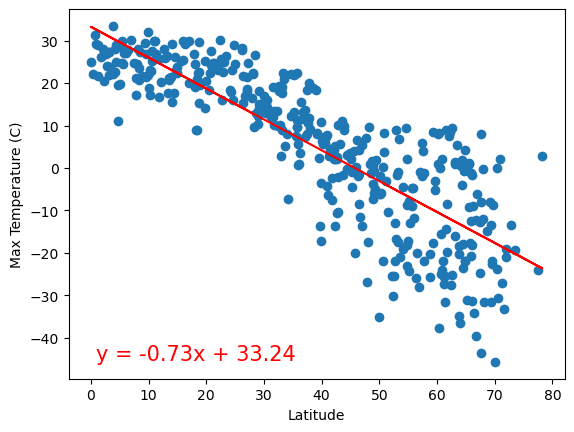

In [57]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

The r-value is: 0.28168946059532973


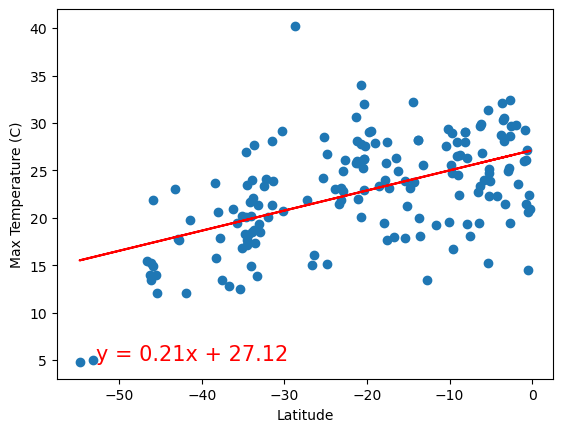

In [59]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07395452576074688


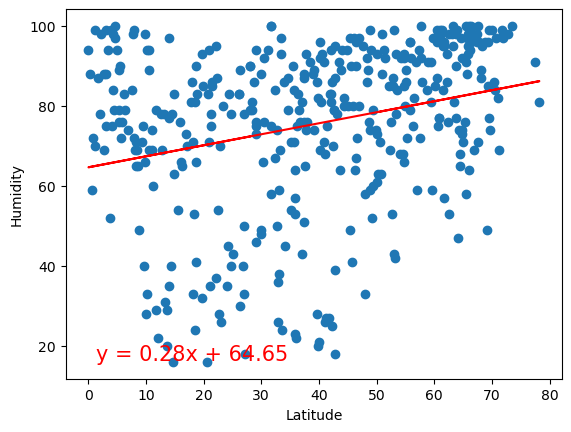

In [60]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

The r-value is: 0.06488803925826177


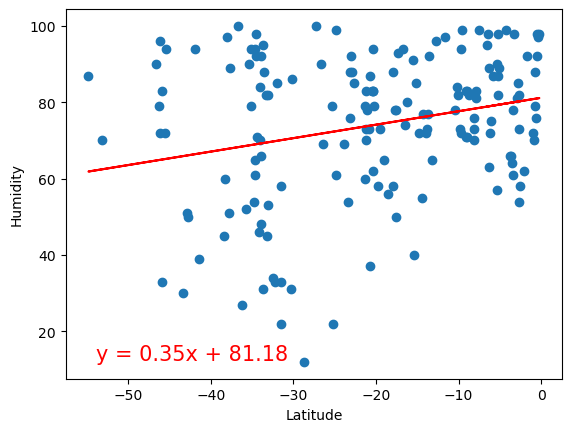

In [61]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027623656820325082


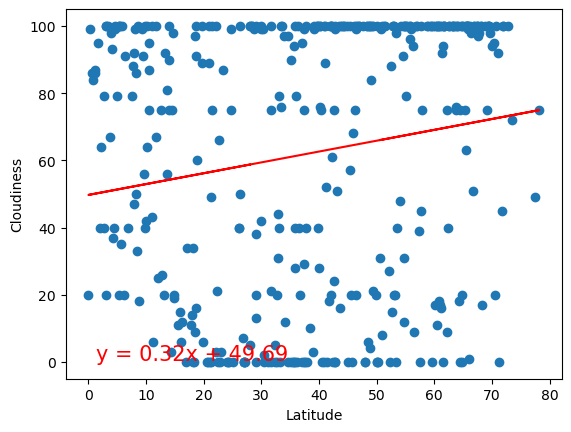

In [62]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

The r-value is: 0.10292536690671329


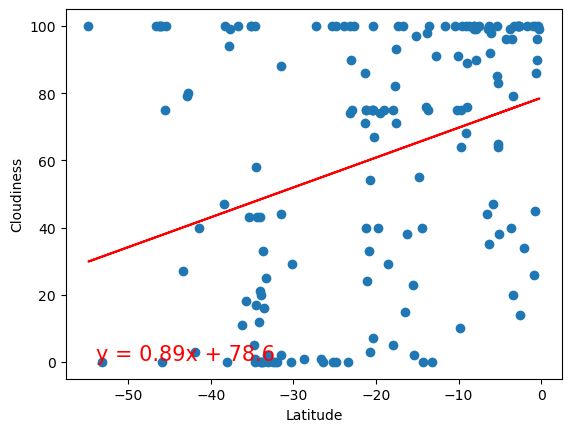

In [63]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018886246015265423


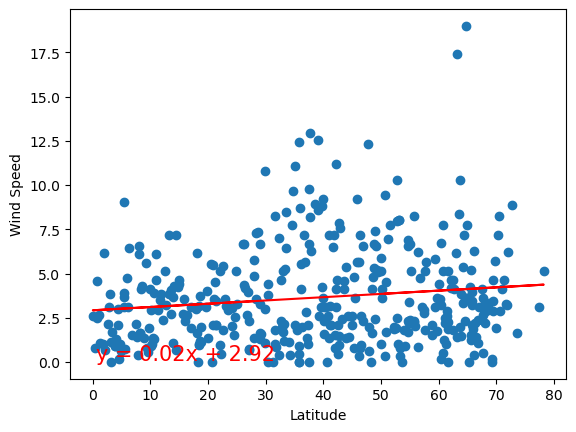

In [64]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

The r-value is: 0.19274331501752423


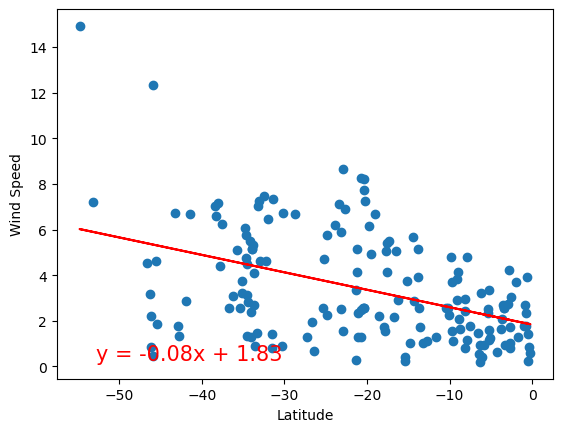

In [65]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE